In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sys
import time

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.sandbox.stats import multicomp

# import utils
sys.path.append("../../utils")
from plotting_utils import *
from classify_utils import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.autolayout'] = False

In [2]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [3]:
np.random.seed(2019)

## variables

In [4]:
fig1f_f = "../../data/05__misc_plots/fig1f_rt_qpcr.txt"
fig1g_f = "../../data/05__misc_plots/fig1g_rt_qpcr.txt"
fig7c_f = "../../data/05__misc_plots/fig7c_rt_qpcr.txt"
fig7b_f = "../../data/05__misc_plots/fig7b_time_course.txt"
figs9a_f = "../../data/05__misc_plots/figs9a_time_course.txt"

## 1. import data

In [5]:
fig1f = pd.read_table(fig1f_f, sep="\t")
fig1f.head()

,gene_name,scram_mean,scram_error,sgrna_mean,sgrna_error
0,LNCPRESS1,1,0.110,0.001130,0.002
1,RP11-267L5.1,1,0.068,0.003870,0.001
2,RP11-297M9.1,1,0.068,0.024405,0.005
3,RP11-568A7.4,1,0.134,0.003870,0.001
4,RP11-1144P22.1,1,0.082,0.005512,0.003


In [6]:
fig1g = pd.read_table(fig1g_f, sep="\t")
fig1g.head()

,gene_name,scram_mean,scram_error,sgrna_mean,sgrna_error
0,LINC00261,1,0.096,0.013508,0.003
1,HOTAIRM1,1,0.193,0.001677,0.073
2,PAX6-AS1,1,0.274,0.134437,0.079


In [7]:
fig7c = pd.read_table(fig7c_f, sep="\t")
fig7c.head()

,gene_name,scram_mean,scram_error,foxd3_shrna_1_mean,foxd3_shrna_1_error,foxd3_shrna_2_mean,foxd3_shrna_2_error
0,SOX17,1,0.182,2.400497,0.293,3.418429,0.845
1,FOXA2,1,0.037,4.218315,0.488,5.376498,0.942
2,CXCR4,1,0.204,5.566099,0.663,2.914672,0.712
3,EOMES,1,0.031,9.601990,0.924,5.566099,0.901
4,GATA6,1,0.165,15.419310,1.648,6.119159,1.181


In [8]:
fig7b = pd.read_table(fig7b_f, sep="\t")
fig7b.head()

,day,foxd3_as1_mean,foxd3_as1_stdev,foxd3_mean,foxd3_stdev,oct4_mean,oct4_stdev,nanog_mean,nanog_stdev,sox2_mean,sox2_stdev
0,Day 1,1.000000,0.121,1.000000,0.119,1.000000,0.126,1.000000,0.078,1.000000,0.094
1,Day 2,0.500000,0.035,0.405189,0.038,0.895025,0.150,0.593231,0.042,0.038296,0.005
2,Day 3,0.038920,0.002,0.092569,0.004,0.216634,0.033,0.535887,0.034,0.015517,0.002
3,Day 4,0.031467,0.012,0.059540,0.008,0.074670,0.011,0.283876,0.035,0.011733,0.002
4,Day 5,0.019961,0.004,0.062789,0.006,0.028229,0.002,0.100365,0.007,0.009355,0.003


In [9]:
figs9a = pd.read_table(figs9a_f, sep="\t")
figs9a.head()

,day,LINC00479_mean,LINC00479_stdev,DIGIT_mean,DIGIT_stdev,RP11-222K16.2_mean,RP11-222K16.2_stdev,RP11-541P9.3_mean,RP11-541P9.3_stdev,LINC00969_mean,...,RP11-57A19.2_mean,RP11-57A19.2_stdev,RP11-474D1.4_mean,RP11-474D1.4_stdev,PVT1_mean,PVT1_stdev,FOXD3-AS1_mean,FOXD3-AS1_stdev,RP11-120D5.1_mean,RP11-120D5.1_stdev
0,Day 1,1.00000,0.206581,1.0000,0.691611,1.0000,0.155,1.000000,0.099795,1.000000,...,1.000000,0.483289,1.000000,0.143,1.000000,0.075,1.000000,0.121,1.000000,0.088806
1,Day 2,13.33057,1.273744,269.3491,20.564260,168.8970,19.837,0.718636,0.047231,0.745700,...,1.827663,0.235329,1.028114,0.071,0.348686,0.023,0.500000,0.035,1.286395,0.070550
2,Day 3,408.25690,19.283440,494.5594,14.620530,351.3260,22.711,4.669711,0.591092,2.887858,...,1.148698,0.276888,0.575678,0.038,0.214146,0.019,0.038920,0.002,0.720298,0.081413
3,Day 4,681.86080,63.962890,297.4837,23.937450,306.5545,16.221,13.392310,0.579373,6.498019,...,0.993093,0.099656,0.419478,0.102,0.206851,0.031,0.031467,0.012,0.742262,0.042661
4,Day 5,1464.98100,64.238910,421.6786,39.473690,213.2891,22.743,21.209910,1.558684,6.175974,...,0.493116,0.091802,0.465440,0.116,0.185565,0.018,0.019961,0.004,0.667420,0.045189


## 2. make Fig 1F

In [10]:
fig1f_m = pd.melt(fig1f, id_vars="gene_name")
fig1f_m.head()

,gene_name,variable,value
0,LNCPRESS1,scram_mean,1.0
1,RP11-267L5.1,scram_mean,1.0
2,RP11-297M9.1,scram_mean,1.0
3,RP11-568A7.4,scram_mean,1.0
4,RP11-1144P22.1,scram_mean,1.0


In [11]:
order = list(fig1f_m.gene_name.unique())
pal = {"scram_mean": "darkgray", "sgrna_mean": "black"}

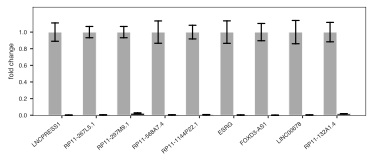

In [12]:
fig = plt.figure(figsize=(6, 2))

ax = sns.barplot(data=fig1f_m[fig1f_m["variable"].str.contains("mean")], 
                 x="gene_name", y="value", hue="variable", order=order, palette=pal)
ax.set_xlabel("")
ax.set_ylabel("fold change")
ax.get_legend().remove()
ax.set_ylim((0, 1.3))
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(order, rotation=40, ha="right", va="top")

# plot errors
x1 = [x-0.2 for x in range(len(order))]
x2 = [x+0.2 for x in range(len(order))]
xs = [[x, y] for x, y in zip(x1, x2)]
xs = [i for x in xs for i in x]
c = 0
for i, x in enumerate(xs):
    if i % 2 == 0:
        name = order[c]
        c += 1
    subvals = fig1f_m[(fig1f_m["gene_name"] == name) & (fig1f_m["variable"].str.contains("mean"))]
    subyerrs = fig1f_m[(fig1f_m["gene_name"] == name) & (fig1f_m["variable"].str.contains("error"))]
    if i % 2 == 0: #scrambled sgRNA
        val_ = subvals[subvals["variable"].str.contains("scram")]["value"].iloc[0]
        yerr_ = subyerrs[subyerrs["variable"].str.contains("scram")]["value"].iloc[0]
    else:
        val_ = subvals[~subvals["variable"].str.contains("scram")]["value"].iloc[0]
        yerr_ = subyerrs[~subyerrs["variable"].str.contains("scram")]["value"].iloc[0]
    ax.plot([x, x], [val_ - yerr_, val_ + yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ - yerr_, val_ - yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ + yerr_, val_ + yerr_], color="black")
    
fig.savefig("Fig1F.pdf", dpi="figure", bbox_inches="tight")

## 3. make Fig 1G

In [13]:
fig1g_m = pd.melt(fig1g, id_vars="gene_name")
fig1g_m.head()

,gene_name,variable,value
0,LINC00261,scram_mean,1.000
1,HOTAIRM1,scram_mean,1.000
2,PAX6-AS1,scram_mean,1.000
3,LINC00261,scram_error,0.096
4,HOTAIRM1,scram_error,0.193


In [14]:
order = list(fig1g_m.gene_name.unique())
pal = {"scram_mean": "darkgray", "sgrna_mean": "black"}

In [15]:
order

['LINC00261', 'HOTAIRM1', 'PAX6-AS1']

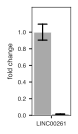

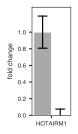

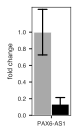

In [16]:
for num, gene in enumerate(order):
    sub = fig1g_m[fig1g_m["gene_name"] == gene]
    
    fig = plt.figure(figsize=(0.7, 2))
    
    ax = sns.barplot(data=sub[sub["variable"].str.contains("mean")], 
                 x="gene_name", y="value", hue="variable", palette=pal)
    ax.set_xlabel("")
    ax.set_ylabel("fold change")
    ax.get_legend().remove()
    ax.set_ylim((0, 1.3))
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels([order[num]])

    # plot errors
    x1 = [x-0.2 for x in range(1)]
    x2 = [x+0.2 for x in range(1)]
    xs = [[x, y] for x, y in zip(x1, x2)]
    xs = [i for x in xs for i in x]
    c = 0
    for i, x in enumerate(xs):
        if i % 2 == 0:
            c += 1
        subvals = sub[(sub["gene_name"] == gene) & (sub["variable"].str.contains("mean"))]
        subyerrs = sub[(sub["gene_name"] == gene) & (sub["variable"].str.contains("error"))]
        if i % 2 == 0: #scrambled sgRNA
            val_ = subvals[subvals["variable"].str.contains("scram")]["value"].iloc[0]
            yerr_ = subyerrs[subyerrs["variable"].str.contains("scram")]["value"].iloc[0]
        else:
            val_ = subvals[~subvals["variable"].str.contains("scram")]["value"].iloc[0]
            yerr_ = subyerrs[~subyerrs["variable"].str.contains("scram")]["value"].iloc[0]
        ax.plot([x, x], [val_ - yerr_, val_ + yerr_], color="black")
        ax.plot([x-0.1, x+0.1], [val_ - yerr_, val_ - yerr_], color="black")
        ax.plot([x-0.1, x+0.1], [val_ + yerr_, val_ + yerr_], color="black")

    fig.savefig("Fig1G_%s.pdf" % str(num+1), dpi="figure", bbox_inches="tight")

## 3. make figure 7C

In [17]:
fig7c_m = pd.melt(fig7c, id_vars="gene_name")
fig7c_m.head()

,gene_name,variable,value
0,SOX17,scram_mean,1.0
1,FOXA2,scram_mean,1.0
2,CXCR4,scram_mean,1.0
3,EOMES,scram_mean,1.0
4,GATA6,scram_mean,1.0


In [18]:
pal = {"scram_mean": "darkgray", "foxd3_shrna_1_mean": sns.color_palette("Set2")[0], 
       "foxd3_shrna_2_mean": sns.color_palette("Set2")[1]}

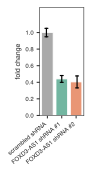

In [19]:
sub = fig7c_m[fig7c_m["gene_name"] == "FOXD3-AS1"]
    
fig = plt.figure(figsize=(0.8, 2))

ax = sns.barplot(data=sub[sub["variable"].str.contains("mean")], 
                 x="variable", y="value", palette=pal)
ax.set_xlabel("")
ax.set_ylabel("fold change")
ax.set_ylim((0, 1.3))
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(["scrambled shRNA", "FOXD3-AS1 shRNA #1", "FOXD3-AS1 shRNA #2"], rotation=40, ha="right", va="top")

# plot errors
xs = [0, 1, 2]

c = 0
for i, x in enumerate(xs):
    if x == 0: #scramble
        val_ = sub[sub["variable"] == "scram_mean"]["value"].iloc[0]
        yerr_ = sub[sub["variable"] == "scram_error"]["value"].iloc[0]
        x = x - 0.067
    elif x == 2: #shrna #2
        val_ = sub[sub["variable"] == "foxd3_shrna_2_mean"]["value"].iloc[0]
        yerr_ = sub[sub["variable"] == "foxd3_shrna_2_error"]["value"].iloc[0]
        x = x + 0.067
    else: #shrna #1
        val_ = sub[sub["variable"] == "foxd3_shrna_1_mean"]["value"].iloc[0]
        yerr_ = sub[sub["variable"] == "foxd3_shrna_1_error"]["value"].iloc[0]
    ax.plot([x, x], [val_ - yerr_, val_ + yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ - yerr_, val_ - yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ + yerr_, val_ + yerr_], color="black")


fig.savefig("Fig7C.pdf", dpi="figure", bbox_inches="tight")

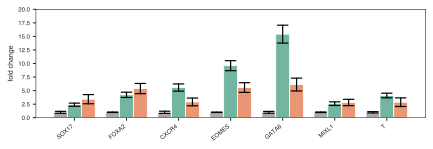

In [20]:
sub = fig7c_m[fig7c_m["gene_name"] != "FOXD3-AS1"]
order = list(sub.gene_name.unique())
    
fig = plt.figure(figsize=(7, 2))

ax = sns.barplot(data=sub[sub["variable"].str.contains("mean")], 
                 x="gene_name", y="value", hue="variable", palette=pal, order=order)
ax.set_xlabel("")
ax.set_ylabel("fold change")
ax.get_legend().remove()
ax.set_ylim((0, 20))
ax.set_xticklabels(order, rotation=40, va="top", ha="right")

# plot errors
x1 = [x-0.2 for x in range(len(order))]
x2 = [x for x in range(len(order))]
x3 = [x+0.2 for x in range(len(order))]
xs = [[x, y, z] for x, y, z in zip(x1, x2, x3)]
xs = [i for x in xs for i in x]

c = 0
for i, x in enumerate(xs):
    if x == -0.2 or ".8" in str(x): #scramble
        name = order[c]
        val_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "scram_mean")]["value"].iloc[0]
        yerr_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "scram_error")]["value"].iloc[0]
        x = x - 0.067
        c += 1
    elif ".2" in str(x): #shrna #2
        val_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "foxd3_shrna_2_mean")]["value"].iloc[0]
        yerr_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "foxd3_shrna_2_error")]["value"].iloc[0]
        x = x + 0.067
    else: #shrna #1
        val_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "foxd3_shrna_1_mean")]["value"].iloc[0]
        yerr_ = sub[(sub["gene_name"] == name) & (sub["variable"] == "foxd3_shrna_1_error")]["value"].iloc[0]
    ax.plot([x, x], [val_ - yerr_, val_ + yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ - yerr_, val_ - yerr_], color="black")
    ax.plot([x-0.1, x+0.1], [val_ + yerr_, val_ + yerr_], color="black")


fig.savefig("Fig7E.pdf", dpi="figure", bbox_inches="tight")

## 4. make Figure 7B

In [21]:
uniq_genes = list(set([x[:-5] for x in fig7b.columns if "_mean" in x]))
uniq_genes

['foxd3', 'oct4', 'sox2', 'foxd3_as1', 'nanog']

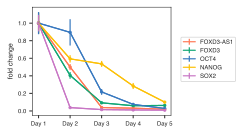

In [22]:
order = ["foxd3_as1", "foxd3", "oct4", "nanog", "sox2"]
labels = ["FOXD3-AS1", "FOXD3", "OCT4", "NANOG", "SOX2"]
colors = sns.xkcd_palette(["melon", "bluish green", "windows blue", "marigold", "orchid"])

fig = plt.figure(figsize=(2.5, 2))

for i, gene, label in zip(list(range(len(order))), order, labels):
    plt.errorbar(fig7b["day"], fig7b["%s_mean" % gene], yerr=fig7b["%s_stdev" % gene], 
                 label=label, color=colors[i])
    plt.plot(fig7b["day"], fig7b["%s_mean" % gene], '-', color=colors[i])
    plt.plot(fig7b["day"], fig7b["%s_mean" % gene], '.', color=colors[i])
    plt.legend(loc=2, bbox_to_anchor=(1.05, 0.75))

plt.ylabel("fold change")
fig.savefig("Fig7B.pdf", dpi="figure", bbox_inches="tight")